# Soal 9

1. [Buat Matrix Scatterplotnya untuk semua variable](#1)
2. [Hitung korelasi tiap variable](#2)
3. [Lakukan multiple regression](#3)
4. [Gunakan fungsi plot() di R untuk mendiagnosa hasil](#4)
5. [Cek apakah ada interaction effect yang berguna](#5)
6. [Coba transformasi yang berbeda, jelaskan hasilnya](#6)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

## 1

In [7]:
# diketahui dari soal soal sebelumnya bahwa Auto.csv mengandung '?'
auto = pd.read_csv('dataset/Auto.csv', na_values='?').dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


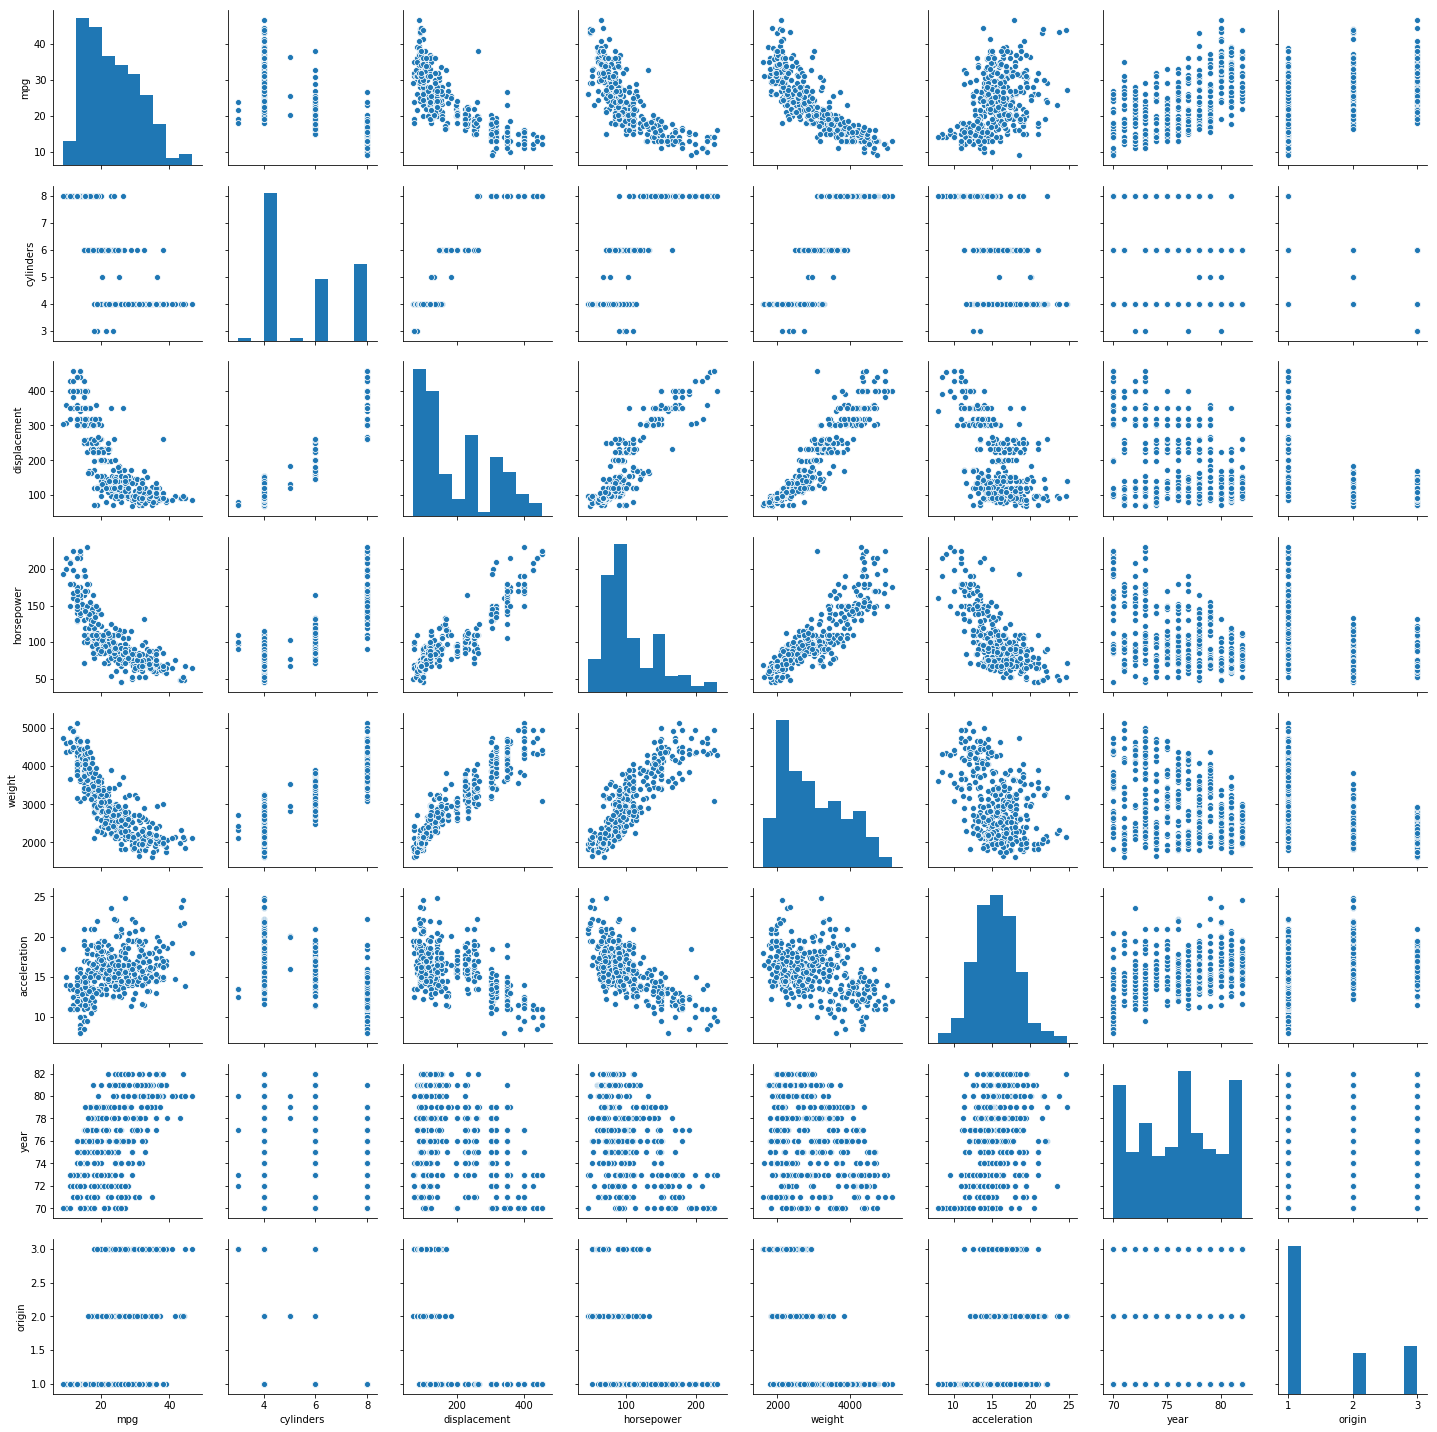

In [10]:
# scatterplot matrix dengan seaborns
g = sns.pairplot(auto)

[kembali ke atas](#Soal-9)

## 2

In [35]:
# correlation
abs(auto.corr())

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,0.777618,0.805127,0.778427,0.832244,0.423329,0.580541,0.565209
cylinders,0.777618,1.000000,0.950823,0.842983,0.897527,0.504683,0.345647,0.568932
displacement,0.805127,0.950823,1.000000,0.897257,0.932994,0.543800,0.369855,0.614535
horsepower,0.778427,0.842983,0.897257,1.000000,0.864538,0.689196,0.416361,0.455171
weight,0.832244,0.897527,0.932994,0.864538,1.000000,0.416839,0.309120,0.585005
acceleration,0.423329,0.504683,0.543800,0.689196,0.416839,1.000000,0.290316,0.212746
year,0.580541,0.345647,0.369855,0.416361,0.309120,0.290316,1.000000,0.181528
origin,0.565209,0.568932,0.614535,0.455171,0.585005,0.212746,0.181528,1.000000


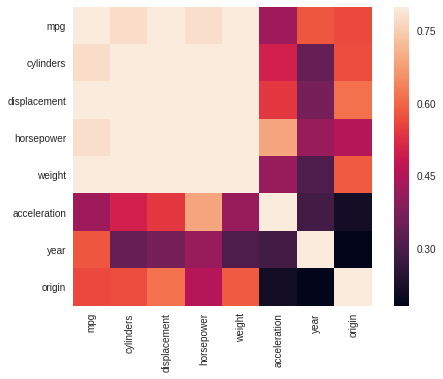

In [34]:
# correlation heatmap menggunakan seaborn
sns.heatmap(abs(auto.corr()), vmax=0.8, square=True)

[kembali ke atas](#Soal-9)

## 3

In [24]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [27]:
auto.shape

(392, 9)

In [21]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 40.6+ KB


In [25]:
multiple_reg = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', auto).fit()

In [26]:
multiple_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          2.04e-139
Time:                        11:27:30   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### i)
Nilai F-Stat lebih besar dari satu dan nilai p-value mendekati nol yang berarti null hypothesis ditolak

### ii)

Dilihat dari hasil di atas, nilai p-value dari acceleration, horsepower, dan cylinders lebih besar dari 0.05. Nilai tersebut menunjukkan bahwa prediktor prediktor tersebut tidak memiliki hubungan yang signifikan dengan response mpg. Sebaliknya, displacement, weight, year, dan origin memiliki hubungan yang signifikan

### iii)

coefnya ialah 0.7508 yang berarti setiap tahun ada kenaikan 0.7508 mpg.

[kembali ke atas](#Soal-9)

## 4

Sama seperti sebelumnya, kita akan membuat plotnya secara manual

In [29]:
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

model_f = 'mpg ~ cylinders + \
                 displacement + \
                 horsepower + \
                 weight + \
                 acceleration + \
                 year + \
                 origin'

auto.reset_index(drop=True, inplace=True)

model = smf.ols(formula=model_f, data=auto)

model_fit = model.fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]


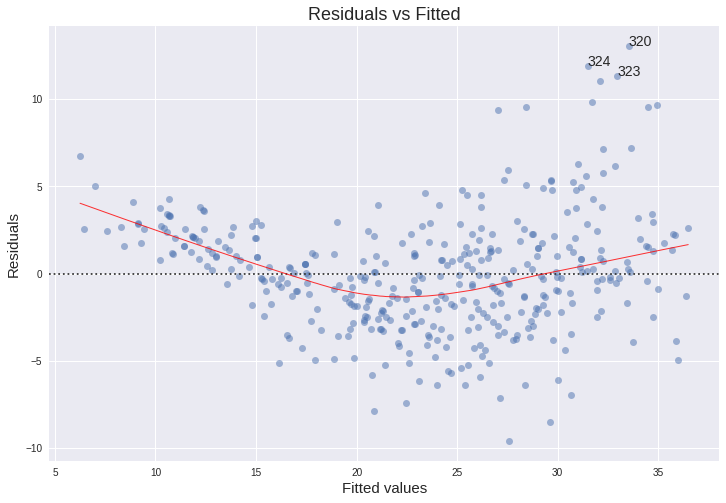

In [30]:
# residuals vs fitted values
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=auto,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

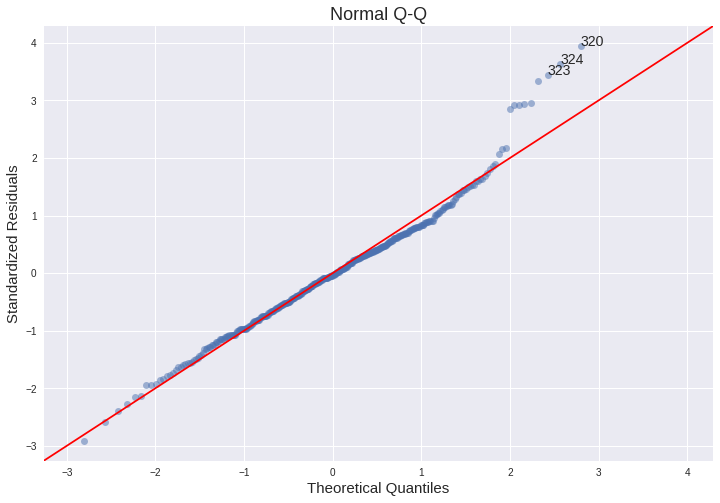

In [31]:
# Q-Q plot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

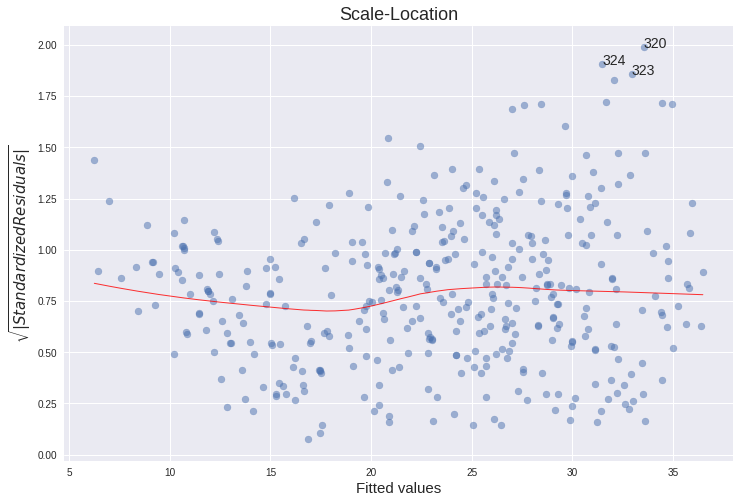

In [32]:
# scale vs location
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

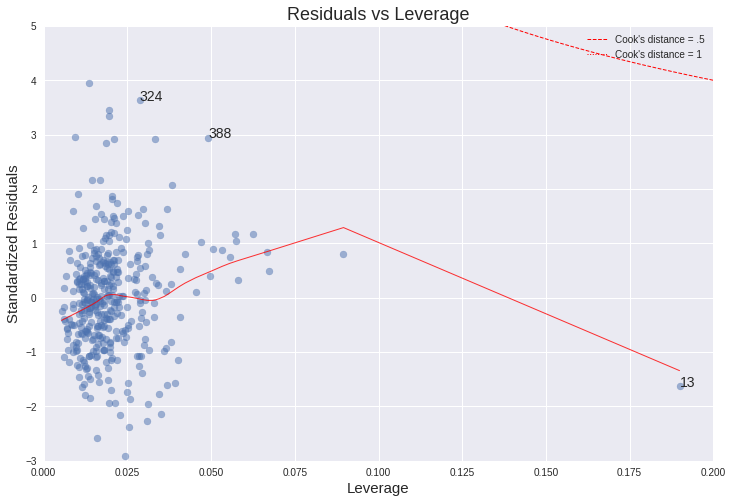

In [33]:
# residual vs leverage
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right');

residual plot berpola -> tidak bagus

titik 13 memiliki leverage point yang tinggi -> tigak bagus

ada beberapa titik berada di luar Q-Q plot -> ada prediktor yang belum masuk



[kembali ke atas](#Soal-9)

## 5

In [39]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [37]:
model = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin\
                + cylinders:cylinders + cylinders:displacement + cylinders:horsepower + cylinders:weight + cylinders:acceleration + cylinders:year + cylinders:origin\
                + displacement:displacement + displacement:horsepower + displacement:weight +
               ear'
interaction_effect = smf.ols(model, auto).fit()
interaction_effect.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     184.0
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          1.09e-162
Time:                        12:09:41   Log-Likelihood:                -945.49
No. Observations:                 392   AIC:                             1923.
Df Residuals:                     376   BIC:                             1987.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -51.3746     26.175     -1.963      0.050    -102.843       0.093
displacement               -0.1818      0.120     -1.521      0.129      -0.417       0.053
horsepower                  0.9485      0.232      4.089      0.000       0.492       1.405
origin                     -3.0637      5.496     -0.557      0.578     -13.871       7.744
weight                     -0.0174      0.016     -1.115      0.265      -0.048       0.013
year                        1.3975      0.328      4.267      0.000       0.754       2.042
displacement:horsepower    -0.0001      0.000     -0.815      0.416      -0.000       0.000
displacement:origin         0.0282      0.013      2.172      0.030       0.003       0.054
displacement:weight      2.792e-05   5.99e-06      4.663      0.000    1.61e-05    3.97e-05
displacement:year           0.0010      0.001      0.710      0.478      -0.002       0.004
horsepower:origin          -0.0629      0.020     -3.104      0.002      -0.103      -0.023
horsepower:weight       -1.175e-05   1.77e-05     -0.664      0.507   -4.65e-05     2.3e-05
horsepower:year            -0.0114      0.003     -3.998      0.000      -0.017      -0.006
origin:weight               0.0014      0.001      1.200      0.231      -0.001       0.004
origin:year                 0.0322      0.069      0.464      0.643      -0.104       0.169
weight:year              7.438e-05      0.000      0.394      0.694      -0.000       0.000
==============================================================================
Omnibus:                       52.658   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.208
Skew:                           0.710   Prob(JB):                     9.61e-26
Kurtosis:                       5.244   Cond. No.                     1.81e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[kembali ke atas](#Soal-9)

## 6

In [43]:
reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + weight + year + origin', auto).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     439.5
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          7.11e-157
Time:                        12:25:35   Log-Likelihood:                -988.57
No. Observations:                 392   AIC:                             1989.
Df Residuals:                     386   BIC:                             2013.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.6457      3.915     -1.698      0.090     -14.343       1.052
horsepower                 -0.2441      0.027     -9.099      0.000      -0.297      -0.191
np.power(horsepower, 2)     0.0008   9.13e-05      9.170      0.000       0.001       0.001
weight                     -0.0044      0.000    -10.426      0.000      -0.005      -0.004
year                        0.7456      0.046     16.145      0.000       0.655       0.836
origin                      1.0465      0.238      4.405      0.000       0.579       1.514
==============================================================================
Omnibus:                       21.819   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.447
Skew:                           0.414   Prob(JB):                     9.00e-08
Kurtosis:                       4.140   Cond. No.                     4.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

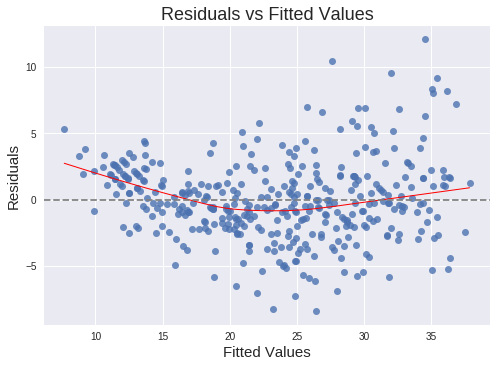

In [45]:
fig = plt.figure()
fitted = reg.fittedvalues
sns.regplot(fitted, auto.mpg - fitted,  lowess=True, line_kws={'color':'r', 'lw':1})
ax = fig.axes[0]
ax.axhline(color="grey", ls="--")
ax.set_title("Residuals vs Fitted Values")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals");

In [47]:
reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + np.log(horsepower) + weight + year + origin', auto).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     378.6
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          4.62e-158
Time:                        12:26:28   Log-Likelihood:                -982.62
No. Observations:                 392   AIC:                             1979.
Df Residuals:                     385   BIC:                             2007.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  80.3681     25.568      3.143      0.002      30.098     130.638
horsepower                  0.2570      0.148      1.737      0.083      -0.034       0.548
np.power(horsepower, 2)    -0.0002      0.000     -0.571      0.568      -0.001       0.000
np.log(horsepower)        -27.5412      8.000     -3.443      0.001     -43.270     -11.812
weight                     -0.0048      0.000    -11.098      0.000      -0.006      -0.004
year                        0.7561      0.046     16.565      0.000       0.666       0.846
origin                      0.9480      0.236      4.016      0.000       0.484       1.412
==============================================================================
Omnibus:                       17.905   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.299
Skew:                           0.312   Prob(JB):                     4.34e-07
Kurtosis:                       4.185   Cond. No.                     2.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + np.log(horsepower) + np.sqrt(horsepower) + weight + year + origin', auto).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     332.9
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          9.16e-159
Time:                        12:26:51   Log-Likelihood:                -977.89
No. Observations:                 392   AIC:                             1972.
Df Residuals:                     384   BIC:                             2004.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -426.3991    167.288     -2.549      0.011    -755.314     -97.485
horsepower                  8.4452      2.676      3.156      0.002       3.184      13.706
np.power(horsepower, 2)    -0.0060      0.002     -3.117      0.002      -0.010      -0.002
np.log(horsepower)        416.0064    144.951      2.870      0.004     131.009     701.004
np.sqrt(horsepower)      -229.6161     74.927     -3.065      0.002    -376.934     -82.298
weight                     -0.0048      0.000    -11.229      0.000      -0.006      -0.004
year                        0.7475      0.045     16.522      0.000       0.659       0.836
origin                      0.9088      0.234      3.886      0.000       0.449       1.369
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.804
Skew:                           0.411   Prob(JB):                     6.18e-09
Kurtosis:                       4.281   Cond. No.                     2.50e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[kembali ke atas](#Soal-9)